# Predict Y from X^2

A nerual network can predict a linear function, but what about a square function?

I know this is an easy project, but it is a great way to test this platform out.

In [ ]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f'TensorFlow version {tf.__version__}')
print(f'Numpy version {np.__version__}')

TensorFlow version 2.12.0
Numpy version 1.22.4


# Load and Review Data
In this case, we mean create and visualize an X^2 function.

In [ ]:
# Create the data
# X values
X = np.arange(-10, 10.5, 0.1)

# Y values
Y = np.square(X)

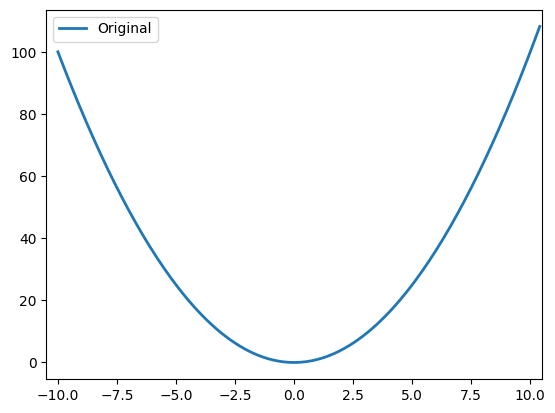

In [ ]:
# Visualize Data
plt.plot(X, Y, linewidth=2, label="Original")
plt.xlim(-10.5, 10.5)
plt.legend()
plt.show()

# Build Model

## Model 1
Build a model with one neuron. It should fail because the only parameters are the slope and the intercept.

In [ ]:
# Build and Compile model
# Let us start with a single NN

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model1.compile(
    loss='huber',
    optimizer='adam',
    metrics=['accuracy']
)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train Model
history1 = model1.fit(
    X,
    Y,
    epochs=500,
    verbose=0
)

In [ ]:
# Make some predictions using the original x values
Yhat1 = model1.predict(X)

7/7 [==============================] - 0s 2ms/step


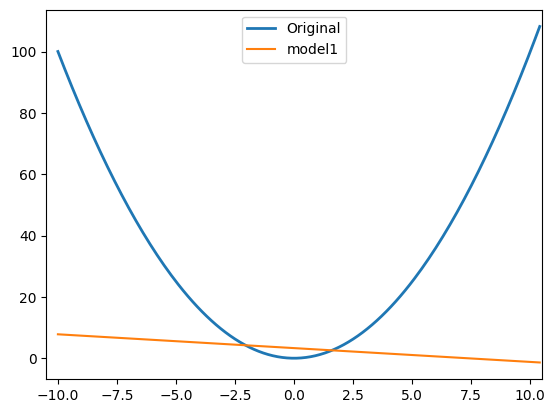

In [ ]:
# Plot the actual function versus the predicted function
plt.plot(X, Y, linewidth=2, label="Original")
plt.plot(X, Yhat1, linewidth=1.5, label="model1")
plt.xlim(-10.5, 10.5)
plt.legend()
plt.show()

Yeah. That didn't work. Let's change the model that we use.

## Model 2

We add in two layers of 64 neurons with a simple relu activation function. That should give some more depth to the model to fit the parabola.

In [ ]:
# Build, Compile, Train
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=[1]),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

model2.compile(
    loss='huber',
    optimizer='adam',
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Okay, let us fit this. Also, let us use a callback to stop when loss no longer decreases
history2 = model2.fit(
    X,
    Y,
    epochs=1000,
    verbose=0
)

In [ ]:
Yhat2 = model2.predict(X)

7/7 [==============================] - 0s 3ms/step


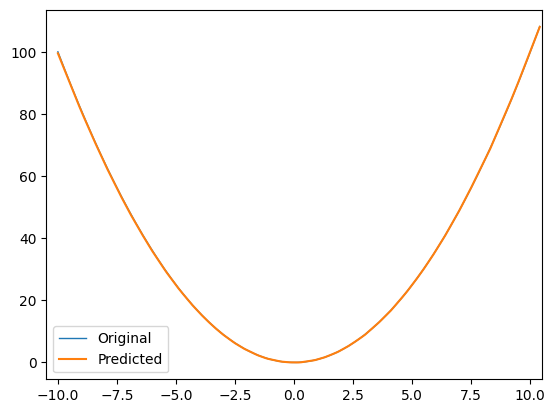

In [ ]:
plt.plot(X, Y, linewidth=1, label="Original")
plt.plot(X, Yhat2, linewidth=1.5, label="Predicted")
plt.xlim(-10.5, 10.5)
plt.legend()
plt.show()

That looks much better! The original data and the model overlap. I know this was an easy exercise, but it is useful to show the power of neural networks for function fitting.

# Save Model

In [ ]:
# Save the model for deployment
model2.save("parabola.h5")